# 1. Load data and Import Libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Firepoints Data

goa_fire = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/FSI-Firepoints-100625 Goa.csv", encoding='latin1')
kerala_fire = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/FSI-Firepoints-100625 kerala.csv", encoding='latin1')
mh_fire = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/FSI-Firepoints-100625 MH.csv", encoding='latin1')

# Load weather data

goa_weather = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/GOA_AWS_IMD_data.csv")
kerala_weather = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/KERALA_AWS_IMD_data.csv")
mh_weather = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/MAHARASHTRA_AWS_IMD_data.csv")

# Load AWS location

aws_locations = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/All AWS Location.csv")

/tmp/ipython-input-1281922565.py:12: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  mh_fire = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/FSI-Firepoints-100625 MH.csv", encoding='latin1')
/tmp/ipython-input-1281922565.py:17: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  kerala_weather = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/KERALA_AWS_IMD_data.csv")


In [2]:
# Preview the firepoints data
print("---------------Firepoints data:-----------------")
print(goa_fire.head())


# Previw the weather data
print("----------------Weather data:---------------------")
print(goa_weather.head())

# Preview the aws locations
print("------------------AWS locations:------------------")
print(aws_locations.head())

---------------Firepoints data:-----------------
    Fire Date Fire Time Source      Latitude     Longitude State   District  \
0  2021-11-11  02:07:15   SNPP  15° 16' 41"N  74° 08' 52"E   GOA  SOUTH GOA   
1  2021-12-03  01:54:57   SNPP  15° 16' 42"N  74° 08' 52"E   GOA  SOUTH GOA   
2  2021-12-17  02:32:19   SNPP  15° 22' 22"N  74° 08' 28"E   GOA  SOUTH GOA   
3  2021-12-18  02:13:23   SNPP  15° 16' 38"N  74° 08' 58"E   GOA  SOUTH GOA   
4  2022-01-11  14:12:49   SNPP  15° 44' 51"N  73° 52' 45"E   GOA  NORTH GOA   

              Circle                       Division          Range  \
0  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
1  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
2  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE   
3  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
4  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   PERNEM RANGE   

  Block/Section/Round            Beat  Forest Block  Co

      osm_id                              name                Type State  \
0  202271962  Chorao Island (Dr.Salim Ali) WLS  Wildlife Sanctuary   Goa   

   Year  Area  feature_id                                           geometry  
0  1988  1.78          62  MULTIPOLYGON (((74.09407 15.45244, 74.10334 15...  


<Axes: >

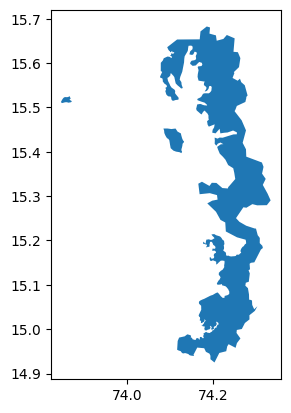

In [3]:
import geopandas as gpd

# Load the shape file
protect_area = gpd.read_file("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/shp/Protect_area.shp")

# Prview spatial data
print(protect_area.head())
protect_area.plot()

# 2. Data Cleaning and Preprocessing

 ## 2.1 Handling missing values in firespoints data

In [4]:
# Checking missing values in firepoints

print("Missing values in Goa Firepoints:\n", goa_fire.isnull().sum())
print("Missing values in Kerala Firepoints:\n", kerala_fire.isnull().sum())
print("Missing values in MH Firepoints:\n", mh_fire.isnull().sum())

Missing values in Goa Firepoints:
 Fire Date                0
Fire Time                0
Source                   0
Latitude                 0
Longitude                0
State                    0
District                 0
Circle                   0
Division                 0
Range                    0
Block/Section/Round      0
Beat                     0
Forest Block           237
Compartment No         237
Unnamed: 14            237
dtype: int64
Missing values in Kerala Firepoints:
 Fire Date                 0
Fire Time                 0
Source                    0
Latitude                  0
Longitude                 0
State                     0
District                  0
Circle                    0
Division                  0
Range                     0
Block/Section/Round    3410
Beat                   3410
Forest Block           3410
Compartment No         3410
Unnamed: 14            3410
dtype: int64
Missing values in MH Firepoints:
 Fire Date                  0
Fire Time    

In [5]:
# Drop the unnamed:14 which is a junk column in every firepoints

goa_fire.drop(columns=['Unnamed: 14'], inplace=True)
kerala_fire.drop(columns=['Unnamed: 14'], inplace=True)
mh_fire.drop(columns=['Unnamed: 14'], inplace=True)

In [6]:
# Drop Forest Block, Compartment number columns

goa_fire.drop(columns=['Forest Block', 'Compartment No'], inplace=True)
kerala_fire.drop(columns=['Forest Block', 'Compartment No'], inplace=True)
mh_fire.drop(columns=['Forest Block', 'Compartment No'], inplace=True)

# Drop Block/Section/Round and Beat column in Kerla
kerala_fire.drop(columns=['Block/Section/Round', 'Beat'], inplace=True)

# Drop nan rows of Range, Beat, Block/Section/Round column in MH
mh_fire.dropna(subset=['Range', 'Beat', 'Block/Section/Round'], inplace=True)

## 2.2 Handling misssing values in Weather and AWS data

In [7]:
# Checking Missing values in weather data

print("Missing values in Goa Weather data:\n", goa_weather.isnull().sum(),"\n")
print("Missing values in Kerala Weather data:\n", kerala_weather.isnull().sum(),"\n")
print("Missing values in MH Weather data:\n", mh_weather.isnull().sum(),"\n")

# Checking missing values in aws data
print("Missing values in AWS Locations:\n", aws_locations.isnull().sum(),"\n")

Missing values in Goa Weather data:
 S NO.                                      0
DISTRICT                                   0
STATION                                    0
DATE(YYYY-MM-DD)                           0
TIME (UTC)                                 0
RAIN FALL CUM. SINCE 0300 UTC (mm)        97
TEMP. ('C)                             44456
TEMP DAY MIN. ('C)                    583613
TEMP DAY MAX. ('C)                    583394
RH (%)                                 69077
RH DAY MIN MAX (%)                    585385
WIND DIR 10 m (Deg)                    13925
WIND SPEED 10 m (Kt)                   13925
WIND SPEED MAX / GUST 10 m (Kt)        82623
WIND DIR 3 m (Deg)                    398066
WIND SPEED 3 m (Kt)                   398066
WIND SPEED MAX / GUST 3 m (Kt)        398066
SLP (hPa)                             260680
MSLP (hPa / gpm)                      260680
SUN SHINE (HH.MM)                     349042
SOIL TEMP 10 cm ('C)                  399386
SOIL MOIS 10 cm (m

In [8]:
# Fill missing numeric values with column-wise mean for weather datas
goa_weather = goa_weather.apply(
    lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col
)

kerala_weather = kerala_weather.apply(
    lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col
)
mh_weather = mh_weather.apply(
    lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col
)

### 2.2.1 Missing values in weather data using interpolation

In [9]:
# Interpolation for Goa weather data

# Convert date to datetime if not already
goa_weather['DATE(YYYY-MM-DD)'] = pd.to_datetime(goa_weather['DATE(YYYY-MM-DD)'])
goa_weather = goa_weather.sort_values(['STATION', 'DATE(YYYY-MM-DD)', 'TIME (UTC)'])

# List columns to interpolate (excluding the already dropped columns)
interp_cols = ["RAIN FALL CUM. SINCE 0300 UTC (mm)", "TEMP. ('C)", "RH (%)", "WIND DIR 10 m (Deg)", "WIND SPEED 10 m (Kt)"]

# Interpolate each station's time series individually
for col in interp_cols:
    goa_weather[col] = (
        goa_weather.groupby('STATION')[col]
        .apply(lambda group: group.interpolate(method='linear'))
        .reset_index(level=0, drop=True)
    )

In [10]:
# Interpolation for Maharastra weather data

# Convert date to datetime if not already
mh_weather['DATE(YYYY-MM-DD)'] = pd.to_datetime(mh_weather['DATE(YYYY-MM-DD)'])
mh_weather = mh_weather.sort_values(['STATION', 'DATE(YYYY-MM-DD)', 'TIME (UTC)'])

# List columns to interpolate (excluding the already dropped columns)
interp_cols = ["RAIN FALL CUM. SINCE 0300 UTC (mm)", "TEMP. ('C)", "RH (%)", "WIND DIR 10 m (Deg)", "WIND SPEED 10 m (Kt)"]

# Interpolate each station's time series individually
for col in interp_cols:
    mh_weather[col] = (
        mh_weather.groupby('STATION')[col]
        .apply(lambda group: group.interpolate(method='linear'))
        .reset_index(level=0, drop=True)
    )


In [11]:
# Interpolation for Kerala weather data

# Remove rows with invalid date strings
kerala_weather = kerala_weather[kerala_weather['DATE(YYYY-MM-DD)'].str.match(r"^\d{4}-(0[1-9]|1[0-2])-(0[1-9]|[12]\d|3[01])$")]

kerala_weather = kerala_weather.sort_values(['STATION', 'DATE(YYYY-MM-DD)', 'TIME (UTC)'])

interp_cols = ["RAIN FALL CUM. SINCE 0300 UTC (mm)", "TEMP. ('C)", "RH (%)", "WIND DIR 10 m (Deg)", "WIND SPEED 10 m (Kt)"]

# Interpolate each station's time series individually
for col in interp_cols:
    kerala_weather[col] = (
        kerala_weather.groupby('STATION')[col]
        .apply(lambda group: group.interpolate(method='linear'))
        .reset_index(level=0, drop=True)
    )


In [12]:
# Verifying Missing values in weather data

print("Missing values in Goa Weather data:\n", goa_weather.isnull().sum(),"\n")
print("Missing values in Kerala Weather data:\n", kerala_weather.isnull().sum(),"\n")
print("Missing values in MH Weather data:\n", mh_weather.isnull().sum(),"\n")

Missing values in Goa Weather data:
 S NO.                                      0
DISTRICT                                   0
STATION                                    0
DATE(YYYY-MM-DD)                           0
TIME (UTC)                                 0
RAIN FALL CUM. SINCE 0300 UTC (mm)         0
TEMP. ('C)                                 0
TEMP DAY MIN. ('C)                         0
TEMP DAY MAX. ('C)                         0
RH (%)                                     0
RH DAY MIN MAX (%)                         0
WIND DIR 10 m (Deg)                        0
WIND SPEED 10 m (Kt)                       0
WIND SPEED MAX / GUST 10 m (Kt)            0
WIND DIR 3 m (Deg)                         0
WIND SPEED 3 m (Kt)                        0
WIND SPEED MAX / GUST 3 m (Kt)             0
SLP (hPa)                                  0
MSLP (hPa / gpm)                           0
SUN SHINE (HH.MM)                          0
SOIL TEMP 10 cm ('C)                       0
SOIL MOIS 10 cm (m

In [13]:
# Print the data head
print(goa_fire.head())

# Print the weather data head after cleaning the data
print("-0--------------------------\n")
print("GOA WEATHER DATA AFTER CLEANING:-\n")
print(goa_weather.head())

    Fire Date Fire Time Source      Latitude     Longitude State   District  \
0  2021-11-11  02:07:15   SNPP  15° 16' 41"N  74° 08' 52"E   GOA  SOUTH GOA   
1  2021-12-03  01:54:57   SNPP  15° 16' 42"N  74° 08' 52"E   GOA  SOUTH GOA   
2  2021-12-17  02:32:19   SNPP  15° 22' 22"N  74° 08' 28"E   GOA  SOUTH GOA   
3  2021-12-18  02:13:23   SNPP  15° 16' 38"N  74° 08' 58"E   GOA  SOUTH GOA   
4  2022-01-11  14:12:49   SNPP  15° 44' 51"N  73° 52' 45"E   GOA  NORTH GOA   

              Circle                       Division          Range  \
0  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
1  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
2  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION    COLEM RANGE   
3  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE   
4  TERITORIAL CIRCLE  NORTH GOA TERITORIAL DIVISION   PERNEM RANGE   

  Block/Section/Round            Beat  
0      KIRLAPAL BLOCK  SANVORDEM BEAT  
1      KIRLAPAL BLOCK  S

## 2.3 Convert Coordinates

In [14]:
import re

def dms_to_decimal(dms_str):
    # Regex pattern to capture degrees, minutes, seconds, direction with optional spaces and both types of quotes
    pattern = r"(\d+)°\s*(\d+)'?\s*(\d+)(?:\"|”)?\s*([NSEW])"
    match = re.match(pattern, dms_str.strip())
    if not match:
        return None
    degrees, minutes, seconds, direction = match.groups()
    dec = float(degrees) + float(minutes)/60 + float(seconds)/3600
    if direction in ['S', 'W']:
        dec = -dec
    return dec

# Apply conversion functions
goa_fire['Latitude'] = goa_fire['Latitude'].apply(dms_to_decimal)
goa_fire['Longitude'] = goa_fire['Longitude'].apply(dms_to_decimal)

print(goa_fire[['Latitude', 'Longitude']])



      Latitude  Longitude
0    15.278056  74.147778
1    15.278333  74.147778
2    15.372778  74.141111
3    15.277222  74.149444
4    15.747500  73.879167
..         ...        ...
232  15.366944  74.146944
233  15.049167  74.160278
234  15.049167  74.160278
235  15.062500  74.021667
236  15.086667  74.231389

[237 rows x 2 columns]


# 3. Align Goa Fire Events with Goa Weather Data by Date-Time

In [26]:
# For goa_weather
goa_weather['TIME (UTC)'] = pd.to_timedelta(goa_weather['TIME (UTC)'])
goa_weather['Weather_DateTime'] = goa_weather['DATE(YYYY-MM-DD)'] + goa_weather['TIME (UTC)']

# For goa_fire
goa_fire['Fire_DateTime'] = pd.to_datetime(goa_fire['Fire Date'] + ' ' + goa_fire['Fire Time'])

# Optional: Round fire datetime to nearest 15 minutes
goa_fire['Fire_DateTime_Rounded'] = goa_fire['Fire_DateTime'].dt.round('15min')

# Step 4: Merge on Fire_DateTime_Rounded and Weather_DateTime
merged_df = pd.merge(
    goa_fire,
    goa_weather,
    left_on='Fire_DateTime_Rounded',
    right_on='Weather_DateTime',
    how='left'
)

print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Fire Date                           977 non-null    object         
 1   Fire Time                           977 non-null    object         
 2   Source                              977 non-null    object         
 3   Latitude                            977 non-null    float64        
 4   Longitude                           977 non-null    float64        
 5   State                               977 non-null    object         
 6   District                            977 non-null    object         
 7   Circle                              977 non-null    object         
 8   Division                            977 non-null    object         
 9   Range                               977 non-null    object         
 10  Block/Section/

# 4. Merge the coordinates of AWS location and Fire points and weather data

In [16]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree
import numpy as np

# and aws_locations is loaded as below:
aws_locations = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/All AWS Location.csv")

# Step 1: Merge by STATION name where possible (case-insensitive trimming)
merged_df['STATION_trimmed'] = merged_df['STATION'].str.strip().str.upper()
aws_locations['STATION_trimmed'] = aws_locations['STATION'].str.strip().str.upper()

merged_with_coords = pd.merge(merged_df,
                              aws_locations[['STATION_trimmed', 'LATITUDE', 'LONGITUDE']],
                              on='STATION_trimmed',
                              how='left',
                              suffixes=('', '_aws'))

# Step 2: Locate rows where LATITUDE (AWS) is missing after merge
missing_coords_mask = merged_with_coords['LATITUDE'].isnull()

# Step 3: Prepare GeoDataFrames for spatial matching (only for missing AWS coords)
fire_points_missing = merged_with_coords[missing_coords_mask].copy()
fire_points_missing['geometry'] = fire_points_missing.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
fire_gdf = gpd.GeoDataFrame(fire_points_missing, geometry='geometry', crs='EPSG:4326')

# AWS locations GeoDataFrame
aws_locations['geometry'] = aws_locations.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
aws_gdf = gpd.GeoDataFrame(aws_locations, geometry='geometry', crs='EPSG:4326')

# Step 4: Build KDTree for AWS locations (geometry coords)
aws_coords = np.array(list(zip(aws_gdf.geometry.x, aws_gdf.geometry.y)))
kd_tree = cKDTree(aws_coords)

# Step 5: Query nearest AWS location for each fire point missing AWS coords
fire_coords = np.array(list(zip(fire_gdf.geometry.x, fire_gdf.geometry.y)))
distances, indices = kd_tree.query(fire_coords, k=1)

# Step 6: Assign nearest AWS station info
nearest_aws = aws_gdf.iloc[indices].reset_index(drop=True)
fire_gdf = fire_gdf.reset_index(drop=True)

fire_gdf['Nearest_Station'] = nearest_aws['STATION']
fire_gdf['Nearest_Latitude'] = nearest_aws['LATITUDE']
fire_gdf['Nearest_Longitude'] = nearest_aws['LONGITUDE']

# Step 7: Update merged_with_coords with nearest station info for rows with missing AWS coords
for idx, row in fire_gdf.iterrows():
    loc = merged_with_coords.index[missing_coords_mask][idx]
    merged_with_coords.at[loc, 'STATION_nearest'] = row['Nearest_Station']
    merged_with_coords.at[loc, 'LATITUDE'] = row['Nearest_Latitude']
    merged_with_coords.at[loc, 'LONGITUDE'] = row['Nearest_Longitude']

# Step 8: Create final station column to unify original and nearest stations
merged_with_coords['Final_Station'] = merged_with_coords['STATION']
fill_mask = merged_with_coords['STATION_nearest'].notnull()
merged_with_coords.loc[fill_mask, 'Final_Station'] = merged_with_coords.loc[fill_mask, 'STATION_nearest']

# Clean up helper columns if desired
#merged_with_coords.drop(columns=['STATION_trimmed', 'STATION_nearest'], inplace=True)

# merged_with_coords now contains logically matched AWS station info for each fire point record
print(merged_with_coords.head())

    Fire Date Fire Time Source   Latitude  Longitude State   District  \
0  2021-11-11  02:07:15   SNPP  15.278056  74.147778   GOA  SOUTH GOA   
1  2021-11-11  02:07:15   SNPP  15.278056  74.147778   GOA  SOUTH GOA   
2  2021-11-11  02:07:15   SNPP  15.278056  74.147778   GOA  SOUTH GOA   
3  2021-12-03  01:54:57   SNPP  15.278333  74.147778   GOA  SOUTH GOA   
4  2021-12-03  01:54:57   SNPP  15.278333  74.147778   GOA  SOUTH GOA   

              Circle                       Division          Range  ...  \
0  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
1  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
2  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
3  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   
4  TERITORIAL CIRCLE  SOUTH GOA TERITORIAL DIVISION  SANGUEM RANGE  ...   

  GLOBAL RAD IATION (v / m2) PAR (micro - mole / m2s) BATTERY (Volts) GPS  \
0                   0.000264     

# 5. Generate negative samples of the dataset

In [33]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
from scipy.spatial import cKDTree

# --- Parameters ---
num_negative_samples = len(merged_with_coords)
min_date = pd.to_datetime(merged_with_coords['Fire Date']).min().date()
max_date = pd.to_datetime(merged_with_coords['Fire Date']).max().date()

lat_col = 'Latitude'
lon_col = 'Longitude'

# --- 1. Generate negative sample locations and datetimes ---
np.random.seed(200)
neg_lat = np.random.uniform(merged_with_coords[lat_col].min(), merged_with_coords[lat_col].max(), num_negative_samples)
neg_lon = np.random.uniform(merged_with_coords[lon_col].min(), merged_with_coords[lon_col].max(), num_negative_samples)

neg_days = np.random.randint(0, (max_date - min_date).days, num_negative_samples)
neg_dates = [min_date + pd.Timedelta(days=int(d)) for d in neg_days]
neg_times = [f"{np.random.randint(0,24):02d}:{np.random.randint(0,60):02d}:{np.random.randint(0,60):02d}" for _ in range(num_negative_samples)]

negative_samples = pd.DataFrame({
    'Fire Date': [d.strftime("%Y-%m-%d") for d in neg_dates],
    'Fire Time': neg_times,
    'Latitude': neg_lat,
    'Longitude': neg_lon
})

# --- 2. Remove negatives too close spatially to positives ---
positive_gdf = gpd.GeoDataFrame(merged_with_coords, geometry=gpd.points_from_xy(merged_with_coords[lon_col], merged_with_coords[lat_col]), crs='EPSG:4326')
negative_gdf = gpd.GeoDataFrame(negative_samples, geometry=gpd.points_from_xy(negative_samples['Longitude'], negative_samples['Latitude']), crs='EPSG:4326')

buffer_distance = 0.01
positive_buffered = positive_gdf.buffer(buffer_distance)

def is_near_fire(point):
    return any(point.within(poly) for poly in positive_buffered)

negative_gdf['is_near_fire'] = negative_gdf.geometry.apply(is_near_fire)
negative_gdf = negative_gdf[negative_gdf['is_near_fire'] == False]

# --- 3. Sample negatives to original count ---
available_neg_samples = len(negative_gdf)
if available_neg_samples >= num_negative_samples:
    negative_gdf = negative_gdf.sample(n=num_negative_samples, random_state=42)
else:
    negative_gdf = negative_gdf.sample(n=num_negative_samples, replace=True, random_state=42)

# --- 4. Assign nearest AWS station ---
aws_locations = pd.read_csv("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/All AWS Location.csv")
aws_coords = np.array(list(zip(aws_locations['LATITUDE'], aws_locations['LONGITUDE'])))
kd_tree = cKDTree(aws_coords)

neg_coords = np.array(list(zip(negative_gdf['Latitude'], negative_gdf['Longitude'])))
_, indices = kd_tree.query(neg_coords, k=1)
negative_gdf['Nearest_Station'] = aws_locations.iloc[indices]['STATION'].values

# Normalize station names
negative_gdf['Nearest_Station'] = negative_gdf['Nearest_Station'].str.upper().str.strip()

# --- 5. Prepare goa_weather ---
goa_weather['Weather_DateTime'] = pd.to_datetime(goa_weather['DATE(YYYY-MM-DD)'].astype(str) + ' ' + goa_weather['TIME (UTC)'].astype(str), errors='coerce')
goa_weather['STATION'] = goa_weather['STATION'].str.upper().str.strip()
goa_weather_clean = goa_weather.dropna(subset=['Weather_DateTime', 'STATION']).copy()
goa_weather_clean['Weather_ts'] = goa_weather_clean['Weather_DateTime'].astype(np.int64)

# --- 6. Create negative sample datetime in int64 for comparison ---
negative_gdf = negative_gdf.reset_index(drop=True)
negative_gdf['Neg_Weather_DateTime'] = pd.to_datetime(negative_gdf['Fire Date'] + ' ' + negative_gdf['Fire Time'], errors='coerce')
negative_gdf['Neg_Weather_ts'] = negative_gdf['Neg_Weather_DateTime'].astype(np.int64)

# Get weather feature columns, excluding identifiers and datetime columns
weather_feature_cols = goa_weather_clean.columns.difference(['Weather_ts', 'Weather_DateTime', 'STATION']).tolist()

# Create dictionary of station -> weather dataframe for fast lookup
station_weather_dict = {
    station: df[['Weather_ts'] + weather_feature_cols]
    for station, df in goa_weather_clean.groupby('STATION')
}

# --- 7. Function to get closest weather record ---
def find_closest_weather(row):
    station = row['Nearest_Station']
    cols = weather_feature_cols
    if station not in station_weather_dict:
        # No records for station, return NaNs
        return pd.Series([np.nan]*len(cols), index=cols)
    df_station = station_weather_dict[station]
    time_diffs = abs(df_station['Weather_ts'] - row['Neg_Weather_ts'])
    idx_min = time_diffs.idxmin()
    rec = df_station.loc[idx_min, cols]
    if isinstance(rec, pd.Series):
        return rec
    else:
        # In case of scalar (unlikely), convert to Series
        return pd.Series([rec], index=cols)

# --- 8. Apply the function ---
weather_features_df = negative_gdf.apply(find_closest_weather, axis=1)

# --- 9. Combine negatives with weather features ---
final_negatives = pd.concat([negative_gdf.reset_index(drop=True), weather_features_df.reset_index(drop=True)], axis=1)

# --- 10. Add missing columns from positives with NaN ---
for col in merged_with_coords.columns:
    if col not in final_negatives.columns:
        final_negatives[col] = np.nan

final_negatives = final_negatives[merged_with_coords.columns]
final_negatives['fire_label'] = 0

# --- 11. Prepare positives labeled ---
positive_labeled = merged_with_coords.copy()
positive_labeled['fire_label'] = 1

# --- 12. Combine positives and negatives ---
dataset_for_model = pd.concat([positive_labeled, final_negatives], ignore_index=True)

# Drop helper columns if any remain
dataset_for_model = dataset_for_model.drop(columns=['geometry', 'is_near_fire', 'Neg_Weather_DateTime', 'Neg_Weather_ts'], errors='ignore')


/tmp/ipython-input-2818174154.py:36: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  positive_buffered = positive_gdf.buffer(buffer_distance)
/tmp/ipython-input-2818174154.py:64: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  goa_weather['Weather_DateTime'] = pd.to_datetime(goa_weather['DATE(YYYY-MM-DD)'].astype(str) + ' ' + goa_weather['TIME (UTC)'].astype(str), errors='coerce')
/tmp/ipython-input-2818174154.py:119: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataset

In [34]:
print(dataset_for_model[dataset_for_model['fire_label'] == 0].head())

      Fire Date Fire Time Source   Latitude  Longitude State District Circle  \
977  2023-05-25  21:37:33    NaN  15.191562  74.178441   NaN      NaN    NaN   
978  2021-11-21  10:38:42    NaN  15.274969  73.851544   NaN      NaN    NaN   
979  2024-05-06  18:01:55    NaN  15.195841  74.210368   NaN      NaN    NaN   
980  2023-05-26  08:54:14    NaN  14.962840  73.793216   NaN      NaN    NaN   
981  2023-10-18  06:58:25    NaN  15.654666  73.842846   NaN      NaN    NaN   

    Division Range  ... PAR (micro - mole / m2s) BATTERY (Volts)  GPS  \
977      NaN   NaN  ...                      NaN             NaN  NaN   
978      NaN   NaN  ...                      NaN             NaN  NaN   
979      NaN   NaN  ...                      NaN             NaN  NaN   
980      NaN   NaN  ...                      NaN             NaN  NaN   
981      NaN   NaN  ...                      NaN             NaN  NaN   

    Weather_DateTime  STATION_trimmed LATITUDE LONGITUDE STATION_nearest  \
977 

In [27]:
# import pandas as pd
# import numpy as np
# from shapely.geometry import Point
# import geopandas as gpd

# # Parameters
# num_negative_samples = len(merged_with_coords)
# date_column = 'Fire Date'
# time_column = 'Fire Time'
# lat_col = 'Latitude'
# lon_col = 'Longitude'

# # 1. Get spatial bounding box from positives
# min_lat, max_lat = merged_with_coords[lat_col].min(), merged_with_coords[lat_col].max()
# min_lon, max_lon = merged_with_coords[lon_col].min(), merged_with_coords[lon_col].max()

# # 2. Temporal range from positives
# min_date = pd.to_datetime(merged_with_coords[date_column]).min().date()
# max_date = pd.to_datetime(merged_with_coords[date_column]).max().date()

# # 3. Generate random NEGATIVE sample locations
# np.random.seed(200)
# neg_lat = np.random.uniform(min_lat, max_lat, num_negative_samples)
# neg_lon = np.random.uniform(min_lon, max_lon, num_negative_samples)

# # 4. Generate random negative sample DATES (not datetimes) and random TIMES
# neg_days = np.random.randint(0, (max_date - min_date).days, num_negative_samples)
# neg_dates = [min_date + pd.Timedelta(days=int(d)) for d in neg_days]
# neg_times = [f"{np.random.randint(0,24):02d}:{np.random.randint(0,60):02d}:{np.random.randint(0,60):02d}" for _ in range(num_negative_samples)]

# negative_samples = pd.DataFrame({
#     'Fire Date': [d.strftime("%Y-%m-%d") for d in neg_dates],  # string as YYYY-MM-DD
#     'Fire Time': neg_times,
#     'Latitude': neg_lat,
#     'Longitude': neg_lon
# })

# # 5. Remove negative samples too close to positives
# positive_gdf = gpd.GeoDataFrame(merged_with_coords, geometry=gpd.points_from_xy(merged_with_coords[lon_col], merged_with_coords[lat_col]), crs='EPSG:4326')
# negative_gdf = gpd.GeoDataFrame(negative_samples, geometry=gpd.points_from_xy(negative_samples['Longitude'], negative_samples['Latitude']), crs='EPSG:4326')
# buffer_distance = 0.01
# positive_buffered = positive_gdf.buffer(buffer_distance)

# def is_near_fire(point):
#     return any(point.within(poly) for poly in positive_buffered)

# negative_gdf['is_near_fire'] = negative_gdf.geometry.apply(is_near_fire)
# negative_gdf = negative_gdf[negative_gdf['is_near_fire'] == False]

# # Fix for sampling size error
# available_neg_samples = len(negative_gdf)
# if available_neg_samples >= num_negative_samples:
#     negative_gdf = negative_gdf.sample(n=num_negative_samples, random_state=42)
# else:
#     negative_gdf = negative_gdf.sample(n=num_negative_samples, replace=True, random_state=42)

# # 6. Assign labels
# positive_labeled = merged_with_coords.copy()
# positive_labeled['fire_label'] = 1

# # Ensure all columns present in negative samples
# for col in positive_labeled.columns:
#     if col not in negative_gdf.columns:
#         negative_gdf[col] = np.nan

# negative_labeled = negative_gdf[positive_labeled.columns]
# negative_labeled['fire_label'] = 0

# # 7. Combine positive and negative samples
# dataset_for_model = pd.concat([positive_labeled, negative_labeled], ignore_index=True)
# dataset_for_model = dataset_for_model.drop(columns=['geometry', 'is_near_fire'], errors='ignore')


/tmp/ipython-input-3859376039.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  positive_buffered = positive_gdf.buffer(buffer_distance)
/tmp/ipython-input-3859376039.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_labeled['fire_label'] = 0
/tmp/ipython-input-3859376039.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataset_for_model = pd.con

In [30]:
print(dataset_for_model[dataset_for_model['fire_label'] == 0].head())

      Fire Date Fire Time Source   Latitude  Longitude State District Circle  \
977  2022-11-10  10:34:24    NaN  15.704500  73.787327   NaN      NaN    NaN   
978  2022-04-27  22:12:12    NaN  15.112409  73.880182   NaN      NaN    NaN   
979  2024-01-24  06:09:43    NaN  15.414474  74.281113   NaN      NaN    NaN   
980  2022-01-23  00:57:08    NaN  15.278078  74.289709   NaN      NaN    NaN   
981  2022-04-08  00:50:39    NaN  15.553833  74.267190   NaN      NaN    NaN   

    Division Range  ... PAR (micro - mole / m2s) BATTERY (Volts)  GPS  \
977      NaN   NaN  ...                      NaN             NaN  NaN   
978      NaN   NaN  ...                      NaN            13.2    L   
979      NaN   NaN  ...                      NaN             NaN  NaN   
980      NaN   NaN  ...                      NaN             NaN  NaN   
981      NaN   NaN  ...                      NaN             NaN  NaN   

    Weather_DateTime  STATION_trimmed LATITUDE LONGITUDE STATION_nearest  \
977 

# 6. SVM Model creation part

## 6.1 Splitting datset into target, test, validation

In [35]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GroupShuffleSplit

# 1. Load shapefile for protected area (Goa regions)
protect_area = gpd.read_file("/content/drive/MyDrive/BITS_PILANI_RESEARCH/Data/Data/shp/Protect_area.shp")

# 2. Convert dataset_for_model points to GeoDataFrame
data = dataset_for_model.copy()
data['geometry'] = data.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(data, geometry='geometry', crs=protect_area.crs)

# 3. Spatial join: assign each fire/no-fire point to polygon region
gdf = gpd.sjoin(gdf, protect_area, how='left', predicate='within')

# 4. Determine spatial group column for stratification (adjust if needed)
spatial_group_col = 'DISTRICT' if 'DISTRICT' in gdf.columns else protect_area.columns[1]

# 5. Sort by 'Fire Date' for temporal ordering
gdf = gdf.sort_values('Fire Date')

# 6. Split dataset by spatial groups using GroupShuffleSplit to prevent leakage
groups = gdf[spatial_group_col]

# Split off test set (10%)
gss = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
train_valid_idx, test_idx = next(gss.split(gdf, groups=groups))

train_valid_data = gdf.iloc[train_valid_idx]
test_data = gdf.iloc[test_idx]

# From train_valid, split 70% train and 20% validation (relative to full data)
train_size = 0.7 / 0.9  # proportion train in train+validation
gss2 = GroupShuffleSplit(n_splits=1, test_size=1 - train_size, random_state=42)
train_idx, valid_idx = next(gss2.split(train_valid_data, groups=train_valid_data[spatial_group_col]))

train_data = train_valid_data.iloc[train_idx]
valid_data = train_valid_data.iloc[valid_idx]

# 7. Define feature columns: exclude non-numeric, identifiers, and label columns
exclude_cols = ['fire_label', 'Fire Date', 'Fire Time', 'Source', 'State', 'District', 'Circle',
                'Division', 'Range', 'Block/Section/Round', 'Beat', 'GPS', 'Weather_DateTime',
                'STATION_trimmed', 'STATION_nearest', 'Final_Station', 'PAR (micro - mole / m2s)',
                'geometry', spatial_group_col]

feature_cols = [col for col in gdf.columns if col not in exclude_cols and pd.api.types.is_numeric_dtype(gdf[col])]

# 8. Prepare feature matrices and target


ValueError: Input contains NaN